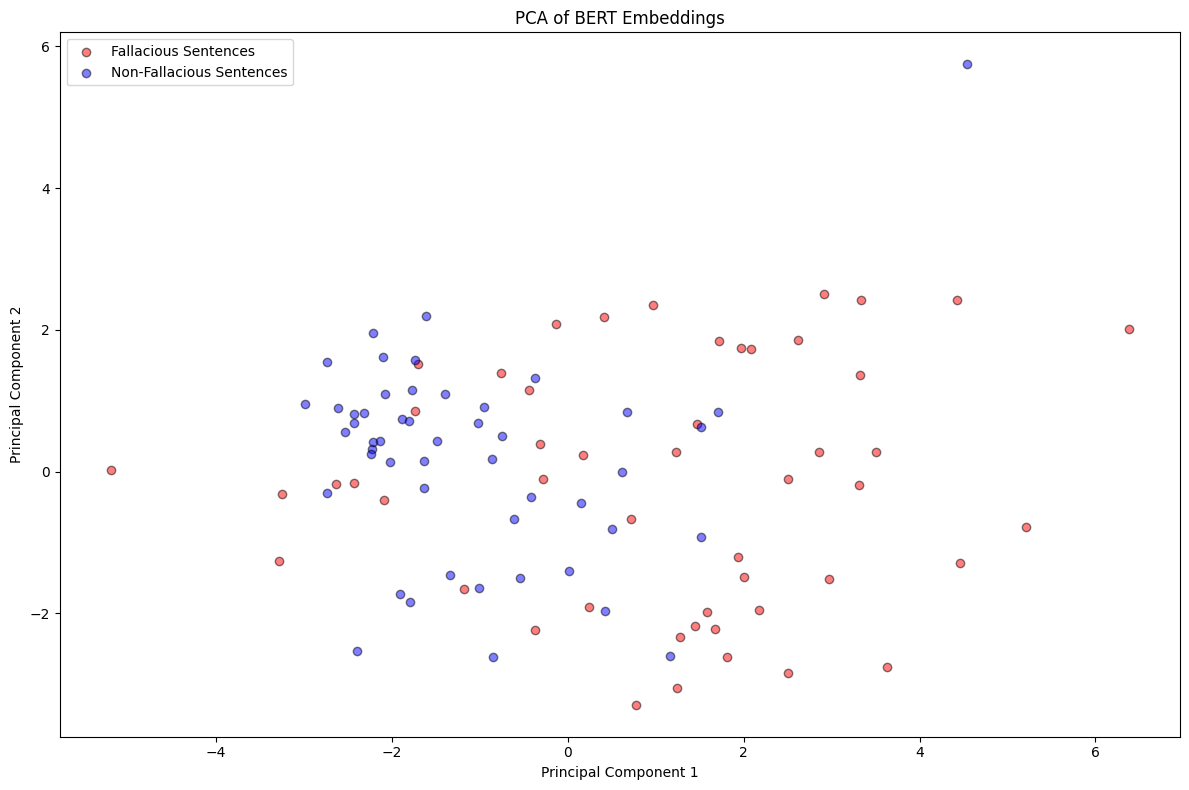

In [4]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Function to generate BERT embeddings
def get_bert_embeddings(sentences, model, tokenizer):
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt', max_length=512)
    encoded_input = encoded_input.to('cuda' if torch.cuda.is_available() else 'cpu')
    with torch.no_grad():
        model_output = model(**encoded_input)
    embeddings = model_output.last_hidden_state[:, 0, :].cpu().numpy()
    return embeddings

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()
if torch.cuda.is_available():
    model.to('cuda')


data_path1 = '/content/edu_all_fixed.csv'
data_path2 = '/content/provided_sentences.csv'

# Load the datasets
data1 = pd.read_csv(data_path1)
data2 = pd.read_csv(data_path2)


sentences1 = data1['source_article'].tolist()[:50]
sentences2 = data2['Sentence'].tolist()[:50]


embeddings1 = get_bert_embeddings(sentences1, model, tokenizer)
embeddings2 = get_bert_embeddings(sentences2, model, tokenizer)


embeddings_combined = np.vstack((embeddings1, embeddings2))
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_combined)


plt.figure(figsize=(12, 8))

plt.scatter(embeddings_pca[:50, 0], embeddings_pca[:50, 1], color='red', label='Fallacious Sentences', alpha=0.5, edgecolor='k')

plt.scatter(embeddings_pca[50:, 0], embeddings_pca[50:, 1], color='blue', label='Non-Fallacious Sentences', alpha=0.5, edgecolor='k')

plt.title('PCA of BERT Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
